In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 
import math
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 

In [2]:
data=pd.read_csv('AR_2_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]

x=data.iloc[:,1]
z=data.iloc[:,2]

print(stats.stdev(x))
print(stats.stdev(y))
print(data)

0.38483074260230693
0.7893834462125735
           A         B        C
0   0.240217  45.48131  0.00300
1   2.175642  44.56355  0.01184
2   0.055222  44.48522  0.01201
3   0.060443  44.94271  0.00330
4   0.070739  44.85158  0.01119
..       ...       ...      ...
66  0.259238  44.73836  0.01216
67  0.380197  44.70017  0.01567
68  0.393662  44.99169  0.00923
69  0.683897  45.37277  0.00411
70  0.346123  44.99354  0.00965

[70 rows x 3 columns]


pendiente b1  -0.5842270307813179
intercepción b0 is 27.26135133669582


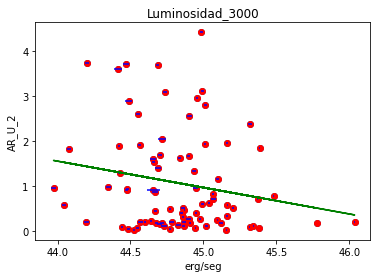

In [14]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_U_2')
plt.savefig("Luminosidad_3000_AR_U_2.pdf")

In [15]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.58422703]
 [ 1.        ]]
Intercepción: [ 2.72613513e+01 -7.10542736e-15]
Errorcuadratico medio : 0.5809140808792537
Raiz del error cuadratico medio:  0.7621771978216442
 Coeficiente de determinacion R2 :  0.5182128482110882


In [16]:
data=pd.read_csv('AR_2_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]

x=data.iloc[:,1]
z=data.iloc[:,2]
print(stats.stdev(x))
print(stats.stdev(y))
print(data)

0.37014633042893613
2.0661794255427655
           A         B        C
0   5.715810  45.48131  0.00300
1   2.637592  44.56355  0.01184
2   0.531011  44.48522  0.01201
3   0.183625  44.94271  0.00330
4   7.928892  44.85158  0.01119
..       ...       ...      ...
74  3.426947  44.59963  0.00717
75  0.739036  44.73006  0.02122
76  0.113311  44.47789  0.01137
77  0.562392  45.01247  0.01123
78  0.297777  44.55196  0.01556

[77 rows x 3 columns]


pendiente b1  0.09424327946050645
intercepción b0 is -2.3144334763417844


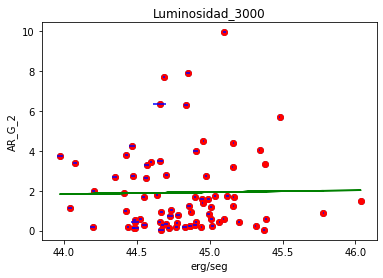

In [17]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_G_2')
plt.savefig("Luminosidad_3000_AR_G_2.pdf")

In [18]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.09424328]
 [1.        ]]
Intercepción: [-2.31443348e+00 -2.13162821e-14]
Errorcuadratico medio : 2.1062267593833854
Raiz del error cuadratico medio:  1.4512845204794909
 Coeficiente de determinacion R2 :  0.5001425219040923


In [19]:
data=pd.read_csv('AR_2_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]

x=data.iloc[:,1]
z=data.iloc[:,2]

print(stats.stdev(x))
print(stats.stdev(y))
print(data)

0.36089656603926096
1.1047409809814466
           A         B        C
0   0.783238  45.48131  0.00300
1   1.910053  44.56355  0.01184
2   0.043060  44.48522  0.01201
3   0.082514  44.94271  0.00330
4   0.418695  44.85158  0.01119
..       ...       ...      ...
79  4.409960  44.98618  0.00803
80  0.707021  45.06799  0.01807
81  0.214624  44.86777  0.01203
82  2.052198  44.71317  0.02774
83  1.337782  44.93590  0.01085

[83 rows x 3 columns]


pendiente b1  -0.5842270307813179
intercepción b0 is 27.26135133669582


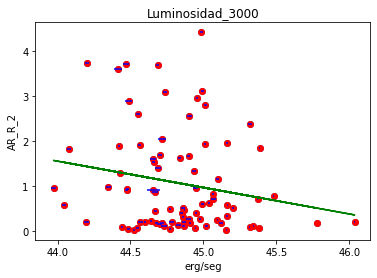

In [20]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_R_2')
plt.savefig("Luminosidad_3000_AR_R_2.pdf")

In [22]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.77451213]
 [ 1.        ]]
Intercepción: [ 3.61177702e+01 -7.10542736e-15]
Errorcuadratico medio : 1.552527389962165
Raiz del error cuadratico medio:  1.2460045706024376
 Coeficiente de determinacion R2 :  0.512249775395436


In [28]:
data=pd.read_csv('AR_I_.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]

x=data.iloc[:,1]

z=data.iloc[:,2]
print(stats.stdev(x))
print(stats.stdev(y))
print(data)

0.36277399721366677
1.7950862202796174
           A         B        C
0   2.624631  45.48131  0.00300
1   2.510650  44.56355  0.01184
2   0.114183  44.48522  0.01201
3   0.129539  44.94271  0.00330
4   0.115155  44.85158  0.01119
..       ...       ...      ...
79  0.450390  44.98618  0.00803
80  0.772785  45.06799  0.01807
81  1.250476  44.86777  0.01203
82  2.436343  44.71317  0.02774
83  1.824101  44.93590  0.01085

[82 rows x 3 columns]


pendiente b1  -0.7745121295242912
intercepción b0 is 36.11777022359003


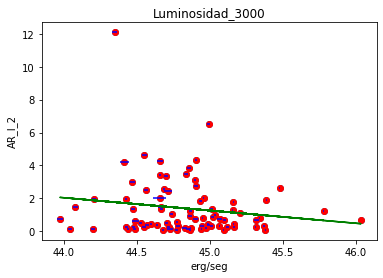

In [29]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_I_2')
plt.savefig("Luminosidad_3000_AR_I_2.pdf")


In [30]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.77451213]
 [ 1.        ]]
Intercepción: [ 3.61177702e+01 -7.10542736e-15]
Errorcuadratico medio : 1.552527389962165
Raiz del error cuadratico medio:  1.2460045706024376
 Coeficiente de determinacion R2 :  0.512249775395436


In [31]:
data=pd.read_csv('AR_2_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]

x=data.iloc[:,1]
z=data.iloc[:,2]

print(stats.stdev(x))
print(stats.stdev(y))
print(data)

0.3710730421586048
1.790487074666796
           A         B        C
0   0.589306  45.48131  0.00300
1   0.281835  44.56355  0.01184
2   0.156123  44.48522  0.01201
3   0.391727  44.94271  0.00330
4   1.529968  44.85158  0.01119
..       ...       ...      ...
86  0.094828  45.73744  0.00214
88  1.784145  44.39641  0.01567
89  0.151232  44.43794  0.01206
90  0.099177  44.40271  0.01366
91  0.163498  44.66232  0.01430

[90 rows x 3 columns]


pendiente b1  -0.9285422927160247
intercepción b0 is 42.356046903963794


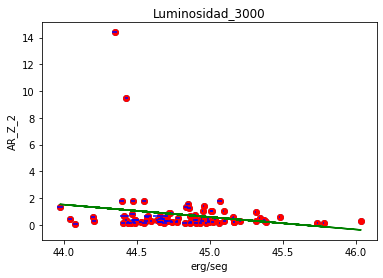

In [32]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_Z_2')
plt.savefig("Luminosidad_3000_AR_Z_2.pdf")

In [33]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.92854229]
 [ 1.        ]]
Intercepción: [4.23560469e+01 1.42108547e-14]
Errorcuadratico medio : 1.5264115232833404
Raiz del error cuadratico medio:  1.2354802804105538
 Coeficiente de determinacion R2 :  0.5185161125665069
